In [1]:
import time
import torch
import numpy as np
import networkx as nx
import collections
import matplotlib.pyplot as plt
from data.gene_graphs import GeneManiaGraph, RegNetGraph
from scipy import sparse
import joblib 
import sklearn.cluster
import scipy.cluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import ward, fcluster, dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
#torch.cuda.set_device(1)

In [2]:

def show_degree(G):  
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    # print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

    # draw graph in inset
    plt.axes([0.4, 0.4, 0.5, 0.5])
    Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
    pos = nx.spring_layout(G)
    plt.axis('off')
    nx.draw_networkx_nodes(G, pos, node_size=20)
    nx.draw_networkx_edges(G, pos, alpha=0.4)

    plt.show()


In [4]:
rand = torch.rand(10,10)
symmetric = torch.mm(rand, rand.t()) # make symmetric positive definite
adj = torch.ByteTensor(symmetric>symmetric.mean())


In [5]:
print(adj)

tensor([[1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 0, 1, 1],
        [1, 1, 0, 0, 1, 1, 1, 0, 1, 1],
        [0, 1, 0, 0, 1, 1, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 0, 1, 1],
        [1, 1, 0, 0, 1, 1, 1, 0, 1, 1]], dtype=torch.uint8)


In [7]:
clusters = AgglomerativeClustering(n_clusters=4, affinity='euclidean', memory='.cache', connectivity=(adj > 0.), compute_full_tree='auto', linkage='ward').fit_predict(adj)
print(clusters)


[0 3 1 1 0 0 2 1 0 0]


/media/martin/the_milano/anaconda3/lib/python3.7/site-packages/sklearn/cluster/hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


In [8]:
new_ids = []
biggest_cluster = np.argmax(np.bincount(clusters))
for i, cluster in enumerate(clusters):
    if cluster != biggest_cluster:
        new_ids.append(i)
new_adj = adj[new_ids, :][:, new_ids]

In [9]:
new_adj

tensor([[1, 0, 1, 1, 0],
        [0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.uint8)

/media/martin/the_milano/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


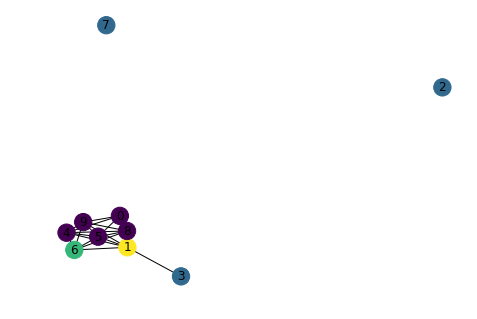

In [10]:
G = nx.from_numpy_matrix(np.matrix(adj)) 
nx.draw(G, node_color=clusters, with_labels=True)

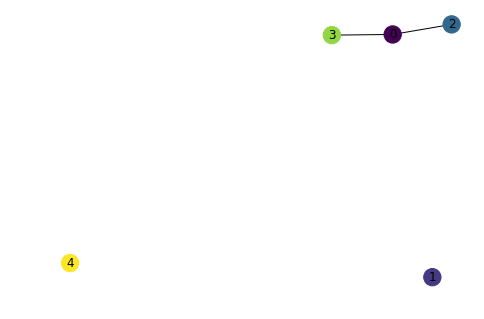

In [11]:
G = nx.from_numpy_matrix(np.matrix(new_adj)) 
nx.draw(G, node_color=new_ids, with_labels=True)

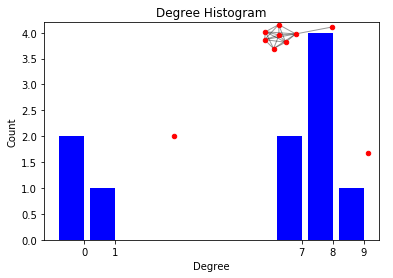

In [12]:
G = nx.from_numpy_matrix(np.matrix(adj))
show_degree(G)

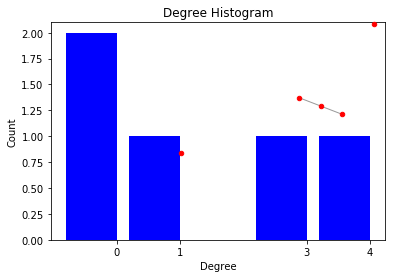

In [13]:
G = nx.from_numpy_matrix(np.matrix(new_adj))
show_degree(G)

In [ ]:


Z = linkage(genemania_adj)

dendrogram(Z)  


/Users/martinweiss/code/academic/conv-graph/venv/lib/python3.5/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


In [ ]:
clusters = AgglomerativeClustering(n_clusters=25, affinity='euclidean', memory='/tmp', connectivity=adj > 0., compute_full_tree='auto', linkage='ward').fit_predict(adj > 0.)
print(clusters)
G = nx.from_numpy_matrix(np.matrix(adj)) 
nx.draw_spring(G, node_color=clusters, with_labels=True)

In [ ]:
clusters

In [410]:
"PTP4A1', 'KLHL25', 'MTFMT', 'CRYGS', 'ITGAX', 'UMOD', 'MAPK9', 'ZNF382', 'BBS9', 'SLC41A1', 'LGALS2', 'TRMT44', 'FAM219A', 'CPSF3L', 'SH2D2A', 'TTC33', 'HSD11B1', 'CLEC12A', 'TUSC1', 'CD99L2', 'FAM105A', 'VASN', 'PSMD3', 'C1orf216"

"PTP4A1', 'KLHL25', 'MTFMT', 'CRYGS', 'ITGAX', 'UMOD', 'MAPK9', 'ZNF382', 'BBS9', 'SLC41A1', 'LGALS2', 'TRMT44', 'FAM219A', 'CPSF3L', 'SH2D2A', 'TTC33', 'HSD11B1', 'CLEC12A', 'TUSC1', 'CD99L2', 'FAM105A', 'VASN', 'PSMD3', 'C1orf216"

In [375]:
dist_adj = pdist(adj)

In [376]:
dist_adj

array([0.35910108, 0.30082571, 0.31920731, ..., 0.33999554, 0.34134374,
       0.20770223])

In [10]:
adj

tensor([[1, 0, 0, 1, 1, 1, 1, 0, 0, 1],
        [0, 1, 1, 0, 1, 1, 1, 0, 0, 1],
        [0, 1, 1, 0, 1, 1, 0, 0, 0, 1],
        [1, 0, 0, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 1]], dtype=torch.uint8)

In [11]:
linkage = scipy.cluster.hierarchy.linkage(dist_adj)


NameError: name 'dist_adj' is not defined

In [362]:
z = ward(linkage)

In [363]:
cluster = fcluster(z, 18, criterion='distance')


In [143]:
len(set(cluster))


49

In [148]:
cluster

99

[5 0 0 3 2 2 4 1 1 2]


/Users/martinweiss/code/academic/conv-graph/venv/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


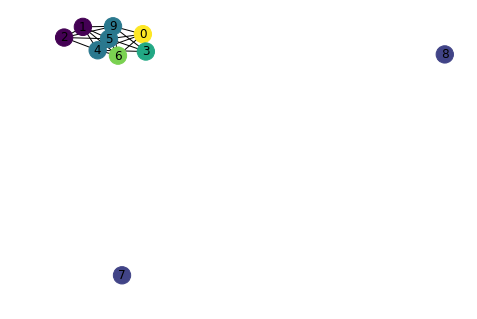

In [28]:
mirror = 1 - adj
clusters = AgglomerativeClustering(n_clusters=6, affinity='euclidean', memory='/tmp', connectivity=adj > 0., compute_full_tree='auto', linkage='ward').fit_predict(mirror)
print(clusters)
G = nx.from_numpy_matrix(np.matrix(adj)) 
nx.draw(G, node_color=clusters, with_labels=True)